# Marketing And Retail Analysis

OList is an e-commerce company that has faced some losses recently and they want to manage their inventory very well so as to reduce any unnecessary costs that they might be bearing.

In this assignment, we need to manage the inventory cost of this e-commerce company. We need to identify top products that contribute to the revenue and also use market basket analysis to analyse the purchase behaviour of individual customers to estimate with relative certainty, what items are more likely to be purchased individually or in combination with some other products.

So ultimately, we need to help OList to identify the product categories which they can get rid of without significantly impacting business.

## Data Exploration and Cleaning

In [2]:
#importing lybraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')


In [3]:
#import all the sheet of excel file from input data

In [4]:
orders=pd.read_excel("Retail_dataset.xlsx", sheet_name='orders')

In [5]:
order_items=pd.read_excel("Retail_dataset.xlsx", sheet_name='order_items')

In [6]:
customers=pd.read_excel("Retail_dataset.xlsx", sheet_name='customers')

In [7]:
payments=pd.read_excel("Retail_dataset.xlsx", sheet_name='payments')

In [8]:
products=pd.read_excel("Retail_dataset.xlsx", sheet_name='products')

#### lets check data of orders sheet and check quality of data and clean it if required

In [9]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26


In [10]:
orders.shape

(99441, 7)

In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_timestamp      96476 non-null  datetime64[ns]
 6   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(3)
memory usage: 5.3+ MB


In [12]:
orders.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [13]:
#we will be considering orders which are completely delivered for this case study.
orders_delivered=orders[orders.order_status=="delivered"]

In [14]:
orders_delivered.order_status.value_counts()

delivered    96478
Name: order_status, dtype: int64

In [15]:
orders_delivered.shape

(96478, 7)

In [16]:
orders_delivered.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_timestamp        datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [17]:
orders_delivered.isnull().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_timestamp         8
order_estimated_delivery_date     0
dtype: int64

In [18]:
orders_delivered[orders_delivered.order_approved_at.isnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,8a9a08c7ca8900a200d83cf838a07e0b,delivered,2017-02-18 14:40:00,NaT,2017-03-01 13:25:33,2017-03-17
16567,8a9adc69528e1001fc68dd0aaebbb54a,91efb7fcabc17925099dced52435837f,delivered,2017-02-18 12:45:31,NaT,2017-03-02 10:05:06,2017-03-21
19031,7013bcfc1c97fe719a7b5e05e61c12db,e1f01a1bd6485e58ad3c769a5427d8a8,delivered,2017-02-18 13:29:47,NaT,2017-03-01 08:07:38,2017-03-17
22663,5cf925b116421afa85ee25e99b4c34fb,7e1a5ca61b572d76b64b6688b9f96473,delivered,2017-02-18 16:48:35,NaT,2017-03-09 07:28:47,2017-03-31
23156,12a95a3c06dbaec84bcfb0e2da5d228a,c8822fce1d0bfa7ddf0da24fff947172,delivered,2017-02-17 13:05:55,NaT,2017-03-02 11:09:19,2017-03-20
26800,c1d4211b3dae76144deccd6c74144a88,6ff8b0d7b35d5c945633b8d60165691b,delivered,2017-01-19 12:48:08,NaT,2017-01-30 18:16:01,2017-03-01
38290,d69e5d356402adc8cf17e08b5033acfb,2e0a2166aa23da2472c6a60c4af6f7a6,delivered,2017-02-19 01:28:47,NaT,2017-03-02 03:41:58,2017-03-27
39334,d77031d6a3c8a52f019764e68f211c69,c4c0011e639bdbcf26059ddc38bd3c18,delivered,2017-02-18 11:04:19,NaT,2017-03-02 16:15:23,2017-03-22
48401,7002a78c79c519ac54022d4f8a65e6e8,d49f3dae6bad25d05160fc17aca5942d,delivered,2017-01-19 22:26:59,NaT,2017-02-06 14:22:19,2017-03-16
61743,2eecb0d85f281280f79fa00f9cec1a95,5a4fa4919cbf2b049e72be460a380e5b,delivered,2017-02-17 17:21:55,NaT,2017-03-03 12:16:03,2017-03-20


In [19]:
orders_delivered[orders_delivered.order_delivered_timestamp.isnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,13467e882eb3a701826435ee4424f2bd,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,NaT,2017-12-18
20618,f5dd62b788049ad9fc0526e3ad11a097,2f17c5b324ad603491521b279a9ff4de,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,NaT,2018-07-16
43834,2ebdfc4f15f23b91474edf87475f108e,1bd06a0c0df8b23dacfd3725d2dc0bb9,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,NaT,2018-07-30
79263,e69f75a717d64fc5ecdfae42b2e8e086,3bc508d482a402715be4d5cf4020cc81,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,NaT,2018-07-30
82868,0d3268bad9b086af767785e3f0fc0133,ebf7e0d43a78c81991a4c59c145c75db,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,NaT,2018-07-24
92643,2d858f451373b04fb5c984a1cc2defaf,d77cf4be2654aa70ef150f8bfec076a6,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaT,2017-06-23
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,cce5e8188bf42ffb3bb5b18ff58f5965,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,NaT,2018-06-26
98038,20edc82cf5400ce95e1afacc25798b31,175378436e2978be55b8f4316bce4811,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,NaT,2018-07-19


In [20]:
#removing entries with null deliverd timestamp
orders_delivered=orders_delivered[~orders_delivered.order_delivered_timestamp.isnull()]

In [21]:
#removing entries with null order approved at
orders_delivered=orders_delivered[~orders_delivered.order_approved_at.isnull()]

In [22]:
orders_delivered.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
dtype: int64

In [23]:
orders_delivered.order_purchase_timestamp.dt.year.value_counts()

2018    52777
2017    43412
2016      267
Name: order_purchase_timestamp, dtype: int64

In [24]:
orders_delivered.order_approved_at.dt.year.value_counts()

2018    52834
2017    43355
2016      267
Name: order_approved_at, dtype: int64

In [25]:
orders_delivered.order_delivered_timestamp.dt.year.value_counts()

2018    55273
2017    40916
2016      267
Name: order_delivered_timestamp, dtype: int64

In [26]:
orders_delivered.order_estimated_delivery_date.dt.year.value_counts(normalize=True)

2018    0.595515
2017    0.401748
2016    0.002737
Name: order_estimated_delivery_date, dtype: float64

In [27]:
#as we can see 2016 has very less percentage of order compare to 2017 and 2018, so we can ignore the 2016

In [28]:
orders_delivered=orders_delivered[orders_delivered.order_delivered_timestamp.dt.year!=2016]

In [29]:
orders_delivered.order_estimated_delivery_date.dt.year.value_counts(normalize=True)

2018    0.597168
2017    0.402832
Name: order_estimated_delivery_date, dtype: float64

In [30]:
#check if we have any duplicate entry in the dataset
orders_delivered[orders_delivered.duplicated(subset=["order_id"])]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date


In [31]:
#No duplicate entry found

### Lets check data of order_item sheet and check quality of data and clean it if required

In [32]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          112650 non-null  object 
 1   order_item_id     112650 non-null  int64  
 2   product_id        112650 non-null  object 
 3   seller_id         112650 non-null  object 
 4   price             112650 non-null  float64
 5   shipping_charges  112650 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 5.2+ MB


In [33]:
order_items.shape

(112650, 6)

In [34]:
order_items.isnull().sum()

order_id            0
order_item_id       0
product_id          0
seller_id           0
price               0
shipping_charges    0
dtype: int64

#### lets check its value counts

In [35]:
order_items.order_id.value_counts()

8272b63d03f5f79c56e9e4120aec44ef    21
1b15974a0141d54e36626dca3fdc731a    20
ab14fdcfbe524636d65ee38360e22ce8    20
9ef13efd6949e4573a18964dd1bbe7f5    15
428a2f660dc84138d969ccd69a0ab6d5    15
                                    ..
5a0911d70c1f85d3bed0df1bf693a6dd     1
5a082b558a3798d3e36d93bfa8ca1eae     1
5a07264682e0b8fbb3f166edbbffc6e8     1
5a071192a28951b76774e5a760c8c9b7     1
fffe41c64501cc87c801fd61db3f6244     1
Name: order_id, Length: 98666, dtype: int64

In [36]:
order_items.product_id.value_counts()

aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
                                   ... 
dbc42f8ad8afd0147a5a46be630781f8      1
5d86ed92606c80a89e547cdba3946812      1
0b8750fa58fefe42cf03a9e2e4b8fce6      1
a4758e74e2cdb74d0c4db83594ca14a3      1
350688d9dc1e75ff97be326363655e01      1
Name: product_id, Length: 32951, dtype: int64

In [37]:
order_items.seller_id.value_counts()

6560211a19b47992c3666cc44a7e94c0    2033
4a3ca9315b744ce9f8e9374361493884    1987
1f50f920176fa81dab994f9023523100    1931
cc419e0650a3c5ba77189a1882b7556a    1775
da8622b14eb17ae2831f4ac5b9dab84a    1551
                                    ... 
400f221ab83037c0ea78f1267da9624d       1
1746c1ae87ac63d530c7c943d0ac42e2       1
16bdc8cefd0e32a6f0824d296c5ad14a       1
ace601496e211a664100321f038f50af       1
13d95f0f6f73943d4ceffad0fc2cd32c       1
Name: seller_id, Length: 3095, dtype: int64

In [38]:
order_items.price.value_counts()

59.90      2481
69.90      1987
49.90      1953
89.90      1548
99.90      1432
           ... 
1369.90       1
108.24        1
1224.99       1
24.52         1
736.00        1
Name: price, Length: 5968, dtype: int64

In [39]:
order_items.shipping_charges.value_counts()

15.10    3707
7.78     2262
14.10    1875
11.85    1846
18.23    1575
         ... 
57.83       1
80.47       1
70.92       1
42.85       1
6.37        1
Name: shipping_charges, Length: 6999, dtype: int64

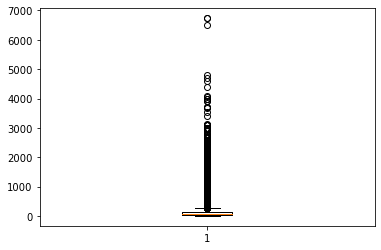

In [40]:
plt.boxplot(order_items.price)
plt.show()

In [41]:
#we havent merged dataset so we would not be able to check which item are costly. so we will do that after we merge the data

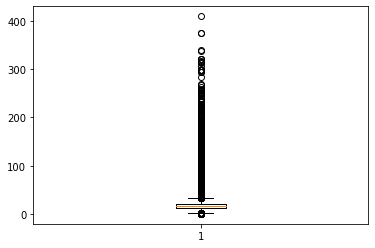

In [42]:
plt.boxplot(order_items.shipping_charges)
plt.show()

###  Lets check data of customers sheet and check quality of data and clean it if required

In [43]:
customers.shape

(99441, 4)

In [44]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_zip_code_prefix  99441 non-null  int64 
 2   customer_city             99441 non-null  object
 3   customer_state            99441 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.0+ MB


In [45]:
customers.customer_id.value_counts()

8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
1b6c7548a2a1f9037c1fd3ddfed95f33     7
ca77025e7201e3b30c44b472ff346268     7
6469f99c1f9dfae7733b25662e7f1782     7
                                    ..
081f07439678af2da7755a0aa572154d     1
9c57789a6a587f4efcfb01e36c106014     1
9e4c21635f640562de1a6976374fba03     1
06c0ea6ee892364d1608ee47aa9f56a0     1
84732c5050c01db9b23e19ba39899398     1
Name: customer_id, Length: 96096, dtype: int64

In [46]:
customers.customer_zip_code_prefix.value_counts()

22790    142
24220    124
22793    121
24230    117
22775    110
        ... 
35698      1
99370      1
64808      1
60876      1
99043      1
Name: customer_zip_code_prefix, Length: 14994, dtype: int64

In [47]:
customers.customer_city.value_counts()

sao paulo            15540
rio de janeiro        6882
belo horizonte        2773
brasilia              2131
curitiba              1521
                     ...  
bequimao                 1
andarai                  1
vargem grande            1
curvelandia              1
eugenio de castro        1
Name: customer_city, Length: 4119, dtype: int64

In [49]:
customers.customer_state.value_counts()

SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_state, dtype: int64

In [50]:
#Lets check if duplicate Customer ID present or not
customers[customers.duplicated(subset=["customer_id"])]

,customer_id,customer_zip_code_prefix,customer_city,customer_state
679,b6c083700ca8c135ba9f0f132930d4e8,8686,suzano,SP
1463,a40096fc0a3862e9e12bc55b5f8e6ab2,20561,rio de janeiro,RJ
1607,b8b3c435a58aebd788a477bed8342910,95585,arroio do sal,RS
2811,66980c3775537536f77b434d74e520f5,30290,belo horizonte,MG
3198,788313d21c3507fe890921f6e17aa679,11070,santos,SP
...,...,...,...,...
99324,8bab3162259edfaadd1ea2e1fe7f58dc,31565,belo horizonte,MG
99327,12ab9334b1240d6d037f2b0102a49571,38050,uberaba,MG
99336,0ee57f62666561b72f2ceacad0230cbf,9530,sao caetano do sul,SP
99353,0ceb502fc33a2ad327b08288c5310e2e,29134,viana,ES


In [61]:
customers[customers.customer_id=="b6c083700ca8c135ba9f0f132930d4e8"]

,customer_id,customer_zip_code_prefix,customer_city,customer_state
132,b6c083700ca8c135ba9f0f132930d4e8,8686,suzano,SP
679,b6c083700ca8c135ba9f0f132930d4e8,8686,suzano,SP


In [62]:
#drop the duplicate alue
customers.drop_duplicates(subset=["customer_id"],inplace=True)

In [63]:
customers.shape

(96096, 4)

In [64]:
#cross checking the same customer id which we checked ealier
customers[customers.customer_id=="b6c083700ca8c135ba9f0f132930d4e8"]

,customer_id,customer_zip_code_prefix,customer_city,customer_state
132,b6c083700ca8c135ba9f0f132930d4e8,8686,suzano,SP


### Lets check data of payments sheet and check quality of data and clean it if required

In [65]:
payments.shape

(103886, 5)

In [66]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [67]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [68]:
payments.payment_sequential.value_counts()

1     99360
2      3039
3       581
4       278
5       170
6       118
7        82
8        54
9        43
10       34
11       29
12       21
13       13
14       10
15        8
18        6
19        6
16        6
17        6
21        4
20        4
22        3
26        2
24        2
23        2
25        2
29        1
28        1
27        1
Name: payment_sequential, dtype: int64

In [69]:
payments.payment_type.value_counts()

credit_card    76795
wallet         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

In [70]:
payments.payment_installments.value_counts()

1     52546
2     12413
3     10461
4      7098
10     5328
5      5239
8      4268
6      3920
7      1626
9       644
12      133
15       74
18       27
11       23
24       18
20       17
13       16
14       15
17        8
16        5
21        3
0         2
22        1
23        1
Name: payment_installments, dtype: int64

In [71]:
payments.payment_value.value_counts()

50.00      324
20.00      274
100.00     255
77.57      250
35.00      165
          ... 
264.64       1
1071.83      1
563.95       1
38.07        1
363.31       1
Name: payment_value, Length: 29077, dtype: int64

### Lets check data of products sheet and check quality of data and clean it if required

In [72]:
products.shape

(32951, 6)

In [73]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             32951 non-null  object 
 1   product_category_name  32781 non-null  object 
 2   product_weight_g       32949 non-null  float64
 3   product_length_cm      32949 non-null  float64
 4   product_height_cm      32949 non-null  float64
 5   product_width_cm       32949 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.5+ MB


In [74]:
products.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,625.0,20.0,17.0,13.0


In [75]:
products.isnull().sum()

product_id                 0
product_category_name    170
product_weight_g           2
product_length_cm          2
product_height_cm          2
product_width_cm           2
dtype: int64

In [76]:
products[products.product_category_name.isnull()]

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...
8149,17823ffd2de8234f0e885a71109613a4,NaN,3750.0,42.0,20.0,24.0
8203,c230b471b7e21ff9060e68ee154afd70,NaN,200.0,16.0,5.0,11.0
8230,fe34503c6bccf918db601aaafd4a975a,NaN,3000.0,16.0,21.0,19.0
8291,0c877471e35049402bca235e06cb8063,NaN,10750.0,34.0,20.0,30.0


In [77]:
#droping the product data who have null values (Null product data is less, so we can drop it directly)
products=products[~products.product_category_name.isnull()]
products=products[~products.product_weight_g.isnull()]

In [78]:
#checking null agian
products.isnull().sum()

product_id               0
product_category_name    0
product_weight_g         0
product_length_cm        0
product_height_cm        0
product_width_cm         0
dtype: int64

In [79]:
products.describe()

,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32779.000000,32779.000000,32779.000000,32779.000000
mean,2275.931328,30.823271,16.944873,23.198389
std,4280.002776,16.928746,13.636420,12.076981
min,0.000000,7.000000,2.000000,6.000000
25%,300.000000,18.000000,8.000000,15.000000
50%,700.000000,25.000000,13.000000,20.000000
75%,1900.000000,38.000000,21.000000,30.000000
max,40425.000000,105.000000,105.000000,118.000000


In [80]:
products[products.product_weight_g==0]

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
9769,81781c0fed9fe1ad6e8c81fca1e1cb08,toys,0.0,30.0,25.0,30.0
13683,8038040ee2a71048d4bdbbdc985b69ab,toys,0.0,30.0,25.0,30.0
14997,36ba42dd187055e1fbe943b2d11430ca,toys,0.0,30.0,25.0,30.0
32079,e673e90efa65a5409ff4196c038bb5af,toys,0.0,30.0,25.0,30.0


In [81]:
products[products.product_weight_g>40000]

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
25166,26644690fde745fc4654719c3904e1db,toys,40425.0,13.0,65.0,28.0


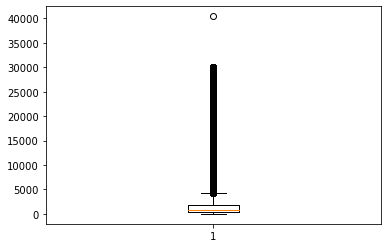

In [82]:
plt.boxplot(products.product_weight_g)
plt.show()

### we can consider this weight abobve 40 kg as an outlier and can remove it from products datasets

In [83]:
products=products[~(products.product_weight_g>40000)]

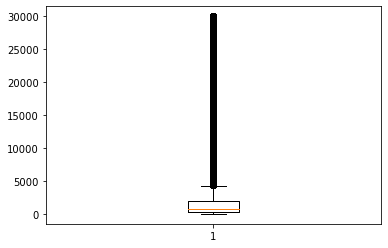

In [84]:
plt.boxplot(products.product_weight_g)
plt.show()

In [85]:
#checking the duplicate values of product data table
products[products.duplicated(subset="product_id")]

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm


In [86]:
#no duplicate in product table

### Lets check the data order items

In [87]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,price,shipping_charges
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


In [88]:
order_item_category=pd.merge(order_items,products, how='left', on="product_id")

In [90]:
order_item_category.head(5)

,order_id,order_item_id,product_id,seller_id,price,shipping_charges,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,toys,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,toys,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,toys,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,toys,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,toys,3750.0,35.0,40.0,30.0


In [91]:
order_item_category=pd.merge(order_item_category,orders_delivered[['order_id','order_status']], on='order_id')

In [92]:
order_item_category.head()

,order_id,order_item_id,product_id,seller_id,price,shipping_charges,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_status
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,toys,650.0,28.0,9.0,14.0,delivered
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,toys,30000.0,50.0,30.0,40.0,delivered
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,toys,3050.0,33.0,13.0,33.0,delivered
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,toys,200.0,16.0,10.0,15.0,delivered
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,toys,3750.0,35.0,40.0,30.0,delivered


In [93]:
order_item_category.shape

(109857, 12)

In [94]:
order_item_category.isnull().sum()

order_id                   0
order_item_id              0
product_id                 0
seller_id                  0
price                      0
shipping_charges           0
product_category_name    396
product_weight_g         396
product_length_cm        396
product_height_cm        396
product_width_cm         396
order_status               0
dtype: int64

In [95]:
#we can do fillna of null values using modes

In [96]:
order_item_category["product_category_name"]=order_item_category["product_category_name"].fillna(order_item_category.product_category_name.mode()[0])

In [97]:
order_item_category["product_weight_g"]=order_item_category["product_weight_g"].fillna(order_item_category.product_weight_g.mode()[0])

In [98]:
order_item_category["product_length_cm"]=order_item_category["product_length_cm"].fillna(order_item_category.product_length_cm.mode()[0])

In [99]:
order_item_category["product_height_cm"]=order_item_category["product_height_cm"].fillna(order_item_category.product_height_cm.mode()[0])

In [100]:
order_item_category["product_width_cm"]=order_item_category["product_width_cm"].fillna(order_item_category.product_width_cm.mode()[0])

In [101]:
order_item_category.isnull().sum()

order_id                 0
order_item_id            0
product_id               0
seller_id                0
price                    0
shipping_charges         0
product_category_name    0
product_weight_g         0
product_length_cm        0
product_height_cm        0
product_width_cm         0
order_status             0
dtype: int64

In [102]:
order_item_category.describe()

,order_item_id,price,shipping_charges,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,109857.000000,109857.000000,109857.000000,109857.000000,109857.000000,109857.000000,109857.000000
mean,1.197994,119.956921,19.950290,2080.540266,30.091346,16.527513,22.979446
std,0.706530,182.360098,15.704927,3728.939525,16.121819,13.391253,11.670521
min,1.000000,0.850000,0.000000,0.000000,7.000000,2.000000,6.000000
25%,1.000000,39.900000,13.080000,300.000000,18.000000,8.000000,15.000000
50%,1.000000,74.900000,16.260000,700.000000,25.000000,13.000000,20.000000
75%,1.000000,134.000000,21.150000,1800.000000,38.000000,20.000000,30.000000
max,21.000000,6735.000000,409.680000,30000.000000,105.000000,105.000000,118.000000


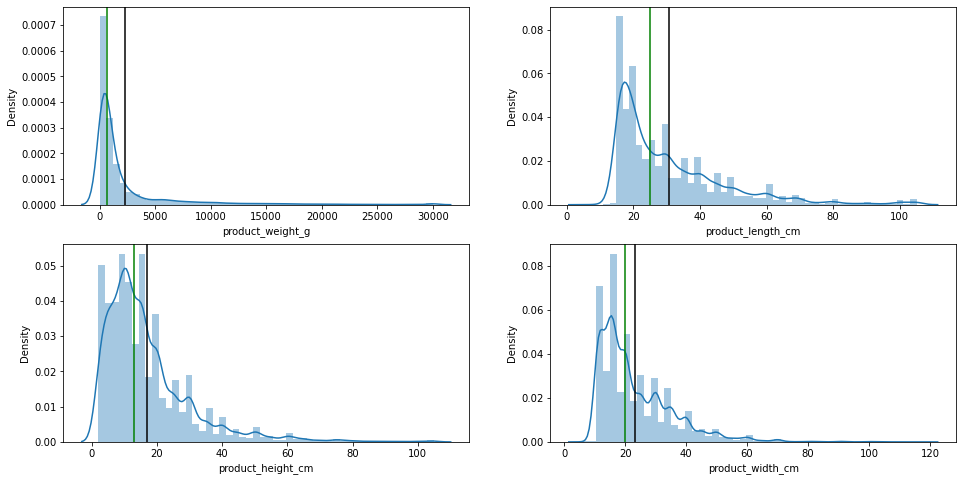

In [103]:
#checking the distibution
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.distplot(products.product_weight_g)
plt.axvline(products.product_weight_g.mean(), color="black")
plt.axvline(products.product_weight_g.median(), color="green")
#plt.show()

plt.subplot(2,2,2)
sns.distplot(products.product_length_cm)
plt.axvline(products.product_length_cm.mean(), color="black")
plt.axvline(products.product_length_cm.median(), color="green")
#plt.show()

plt.subplot(2,2,3)
sns.distplot(products.product_height_cm)
plt.axvline(products.product_height_cm.mean(), color="black")
plt.axvline(products.product_height_cm.median(), color="green")
#plt.show()

plt.subplot(2,2,4)
sns.distplot(products.product_width_cm)
plt.axvline(products.product_width_cm.mean(), color="black")
plt.axvline(products.product_width_cm.median(), color="green")

plt.show()

### Market Basket Anaysis
Market basket analysis is a technique which helps us do cross-selling effectively by building strategies using the data of the purchases. This is because cross-selling can help increase profits by recommending groups of similar items to consumers. Using market basket analysis, we try to identify the strength of association between two products. Market basket analysis would help us identify combinations of products which are bought frequently.
we will use apriori trick to redduce the computational power of  market basket analysis

In [104]:
basket=order_item_category.groupby(["order_id","product_category_name"])["price"].sum().unstack().reset_index().fillna(0).set_index("order_id")

In [105]:
basket.head()

product_category_name,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,...,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
order_id,,,,,,,,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.90,0.0
00018f77f2f0320c557190d7a144bdd3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,239.90,0.0
000229ec398224ef6ca0657da4fc703e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,199.00,0.0
00024acbcdf0a6daa1e931b038114c75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.99,0.0
00042b26cf59d7ce69dfabb4e55b4fd9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,199.90,0.0


In [106]:
basket.describe()

product_category_name,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,...,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
count,96189.000000,96189.000000,96189.000000,96189.000000,96189.000000,96189.000000,96189.000000,96189.000000,96189.000000,96189.000000,...,96189.000000,96189.000000,96189.000000,96189.000000,96189.000000,96189.000000,96189.000000,96189.000000,96189.000000,96189.000000
mean,0.153272,0.173645,0.016342,0.003948,0.045617,1.443105,0.970381,2.409552,0.110904,0.020553,...,0.001040,0.060583,0.526428,0.102496,2.489272,0.591196,0.068939,0.780537,104.459006,2.852672
std,10.387342,9.338262,1.594754,0.806553,2.080580,24.169476,21.983772,21.177297,5.836634,2.678622,...,0.322431,7.255447,24.289258,12.148771,27.373247,11.421097,3.728829,15.419821,192.910028,38.463135
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.650000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,125.000000,0.000000
max,2199.000000,1554.000000,250.000000,238.000000,399.000000,1788.000000,3899.000000,1914.580000,549.900000,749.000000,...,100.000000,2119.600000,3999.000000,2899.000000,2600.000000,1727.000000,889.990000,1520.880000,13440.000000,2999.000000


In [107]:
#lets create binary table such that we can analize it
def encode(x):
    if x <=0:
        return 0
    if x>0:
        return 1
basket_1_0=basket.applymap(encode)
basket_1_0

product_category_name,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,...,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
order_id,,,,,,,,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
00018f77f2f0320c557190d7a144bdd3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
000229ec398224ef6ca0657da4fc703e,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
00024acbcdf0a6daa1e931b038114c75,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
00042b26cf59d7ce69dfabb4e55b4fd9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fffcd46ef2263f404302a634eb57f7eb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
fffce4705a9662cd70adb13d4a31832d,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [108]:
#we will consider basket who has products more than two
basket_morethan_2=basket_1_0[basket_1_0.sum(axis=1)>=2]

In [109]:
#min support required is 0.3
min_support = 0.3

In [110]:
pip install mlxtend

  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2
Note: you may need to restart the kernel to use updated packages.


In [111]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [112]:
#lets run aprori program
frequent_items_2 = apriori(basket_morethan_2, min_support=0.03, use_colnames=True)
frequent_items_2

C:\Users\Ameya\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.031274,(auto)
1,0.230649,(bed_bath_table)
2,0.084441,(computers_accessories)
3,0.032838,(fashion_bags_accessories)
4,0.125098,(furniture_decor)
5,0.042220,(garden_tools)
6,0.065676,(health_beauty)
7,0.053948,(housewares)
8,0.055512,(sports_leisure)
9,0.971071,(toys)


In [113]:
apriori_data_2 = association_rules(frequent_items_2, metric="confidence", min_threshold=0.1)
apriori_data_2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(auto),(toys),0.031274,0.971071,0.030493,0.975000,1.004046,0.000123,1.157154,0.004160
1,(bed_bath_table),(toys),0.230649,0.971071,0.226740,0.983051,1.012337,0.002763,1.706802,0.015840
2,(toys),(bed_bath_table),0.971071,0.230649,0.226740,0.233494,1.012337,0.002763,1.003712,0.421249
3,(computers_accessories),(toys),0.084441,0.971071,0.080532,0.953704,0.982115,-0.001467,0.624863,-0.019502
4,(fashion_bags_accessories),(toys),0.032838,0.971071,0.032056,0.976190,1.005272,0.000168,1.215012,0.005422
5,(furniture_decor),(toys),0.125098,0.971071,0.117279,0.937500,0.965429,-0.004200,0.462862,-0.039320
6,(toys),(furniture_decor),0.971071,0.125098,0.117279,0.120773,0.965429,-0.004200,0.995081,-0.553140
7,(garden_tools),(toys),0.042220,0.971071,0.035184,0.833333,0.858159,-0.005815,0.173573,-0.147173
8,(health_beauty),(toys),0.065676,0.971071,0.062549,0.952381,0.980753,-0.001228,0.607506,-0.020572
9,(housewares),(toys),0.053948,0.971071,0.049257,0.913043,0.940244,-0.003130,0.332682,-0.062949


In [114]:
apriori_lift_2=apriori_data_2[(apriori_data_2['lift'] > 1)]
apriori_lift_2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(auto),(toys),0.031274,0.971071,0.030493,0.975000,1.004046,0.000123,1.157154,0.004160
1,(bed_bath_table),(toys),0.230649,0.971071,0.226740,0.983051,1.012337,0.002763,1.706802,0.015840
2,(toys),(bed_bath_table),0.971071,0.230649,0.226740,0.233494,1.012337,0.002763,1.003712,0.421249
4,(fashion_bags_accessories),(toys),0.032838,0.971071,0.032056,0.976190,1.005272,0.000168,1.215012,0.005422
11,(watches_gifts),(toys),0.058640,0.971071,0.057076,0.973333,1.002330,0.000133,1.084832,0.002469


In [115]:
frequent_items_2["itemsets"] = frequent_items_2["itemsets"].apply(lambda x: ', '.join(list(x))).astype("unicode")

apriori_data_2["antecedents"] = apriori_data_2["antecedents"].apply(lambda x: ', '.join(list(x))).astype("unicode")

apriori_data_2["consequents"] = apriori_data_2["consequents"].apply(lambda x: ', '.join(list(x))).astype("unicode")

apriori_lift_2["antecedents"] = apriori_lift_2["antecedents"].apply(lambda x: ', '.join(list(x))).astype("unicode")

apriori_lift_2["consequents"] = apriori_lift_2["consequents"].apply(lambda x: ', '.join(list(x))).astype("unicode") 

In [116]:
apriori_lift_2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,auto,toys,0.031274,0.971071,0.030493,0.975000,1.004046,0.000123,1.157154,0.004160
1,bed_bath_table,toys,0.230649,0.971071,0.226740,0.983051,1.012337,0.002763,1.706802,0.015840
2,toys,bed_bath_table,0.971071,0.230649,0.226740,0.233494,1.012337,0.002763,1.003712,0.421249
4,fashion_bags_accessories,toys,0.032838,0.971071,0.032056,0.976190,1.005272,0.000168,1.215012,0.005422
11,watches_gifts,toys,0.058640,0.971071,0.057076,0.973333,1.002330,0.000133,1.084832,0.002469


### Lets consider basket who has products more than three

In [117]:
basket_morethan_3=basket_1_0[basket_1_0.sum(axis=1)>=3]

In [118]:
min_support = 0.3

In [119]:
frequent_items_3 = apriori(basket_morethan_3, min_support=0.03, use_colnames=True)
frequent_items_3

C:\Users\Ameya\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.5,(bed_bath_table)
1,0.1,(cine_photo)
2,0.2,(computers_accessories)
3,0.1,(electronics)
4,0.4,(furniture_decor)
5,0.2,(garden_tools)
6,0.1,(health_beauty)
7,0.1,(home_construction)
8,0.1,(housewares)
9,0.1,(office_furniture)


In [120]:
apriori_data_3 = association_rules(frequent_items_3, metric="confidence", min_threshold=0.1).sort_values('lift', ascending=False).reset_index(drop=True)
apriori_data_3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(cine_photo),(telephony),0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
1,(telephony),"(cine_photo, toys)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
2,(cine_photo),"(telephony, toys)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
3,"(telephony, toys)",(cine_photo),0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
4,"(cine_photo, toys)",(telephony),0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
...,...,...,...,...,...,...,...,...,...,...
89,(telephony),(toys),0.1,1.0,0.1,1.0,1.0,0.00,inf,0.0
90,(toys),(telephony),1.0,0.1,0.1,0.1,1.0,0.00,1.0,0.0
91,(toys),(office_furniture),1.0,0.1,0.1,0.1,1.0,0.00,1.0,0.0
92,(office_furniture),(toys),0.1,1.0,0.1,1.0,1.0,0.00,inf,0.0


In [121]:
apriori_lift_3=apriori_data_3[(apriori_data_3['lift'] > 1)]
apriori_lift_3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(cine_photo),(telephony),0.1,0.1,0.1,1.00,10.00,0.09,inf,1.000000
1,(telephony),"(cine_photo, toys)",0.1,0.1,0.1,1.00,10.00,0.09,inf,1.000000
2,(cine_photo),"(telephony, toys)",0.1,0.1,0.1,1.00,10.00,0.09,inf,1.000000
3,"(telephony, toys)",(cine_photo),0.1,0.1,0.1,1.00,10.00,0.09,inf,1.000000
4,"(cine_photo, toys)",(telephony),0.1,0.1,0.1,1.00,10.00,0.09,inf,1.000000
5,(telephony),(cine_photo),0.1,0.1,0.1,1.00,10.00,0.09,inf,1.000000
6,(home_construction),"(computers_accessories, toys)",0.1,0.2,0.1,1.00,5.00,0.08,inf,0.888889
7,(computers_accessories),"(home_construction, toys)",0.2,0.1,0.1,0.50,5.00,0.08,1.800000,1.000000
8,(home_construction),(computers_accessories),0.1,0.2,0.1,1.00,5.00,0.08,inf,0.888889
9,"(home_construction, toys)",(computers_accessories),0.1,0.2,0.1,1.00,5.00,0.08,inf,0.888889


In [122]:
frequent_items_3["itemsets"] = frequent_items_3["itemsets"].apply(lambda x: ', '.join(list(x))).astype("unicode")

apriori_data_3["antecedents"] = apriori_data_3["antecedents"].apply(lambda x: ', '.join(list(x))).astype("unicode")

apriori_data_3["consequents"] = apriori_data_3["consequents"].apply(lambda x: ', '.join(list(x))).astype("unicode")

apriori_lift_3["antecedents"] = apriori_lift_3["antecedents"].apply(lambda x: ', '.join(list(x))).astype("unicode")

apriori_lift_3["consequents"] = apriori_lift_3["consequents"].apply(lambda x: ', '.join(list(x))).astype("unicode") 

In [123]:
apriori_lift_3.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,cine_photo,telephony,0.1,0.1,0.1,1.00,10.0,0.09,inf,1.000000
1,telephony,"cine_photo, toys",0.1,0.1,0.1,1.00,10.0,0.09,inf,1.000000
2,cine_photo,"telephony, toys",0.1,0.1,0.1,1.00,10.0,0.09,inf,1.000000
3,"telephony, toys",cine_photo,0.1,0.1,0.1,1.00,10.0,0.09,inf,1.000000
4,"cine_photo, toys",telephony,0.1,0.1,0.1,1.00,10.0,0.09,inf,1.000000
5,telephony,cine_photo,0.1,0.1,0.1,1.00,10.0,0.09,inf,1.000000
6,home_construction,"computers_accessories, toys",0.1,0.2,0.1,1.00,5.0,0.08,inf,0.888889
7,computers_accessories,"home_construction, toys",0.2,0.1,0.1,0.50,5.0,0.08,1.8,1.000000
8,home_construction,computers_accessories,0.1,0.2,0.1,1.00,5.0,0.08,inf,0.888889
9,"home_construction, toys",computers_accessories,0.1,0.2,0.1,1.00,5.0,0.08,inf,0.888889


#### Now we have apriori data with likely two and three products

### create one excel file with all this cleaned data

In [124]:
with pd.ExcelWriter('retail_data_apriori.xlsx', engine='openpyxl') as writer:
    orders_delivered.to_excel(writer, sheet_name="orders_delivered")
    order_item_category.to_excel(writer, sheet_name="order_items")
    customers.to_excel(writer, sheet_name="customers")
    payments.to_excel(writer, sheet_name="payments")
    apriori_data_2.to_excel(writer, sheet_name="apriori_data_2")
    apriori_data_3.to_excel(writer, sheet_name="apriori_data_3")
   

In [125]:
#lets coninue the assignmet in PowerBI
import os
os.getcwd()

'C:\\Users\\Ameya\\Downloads'

### Lets coninue the assignmet in PowerBI